In [ ]:
import os
import numpy as np
from PIL import Image
from skimage.transform import resize
import numpy as np
from numpy.random import seed
seed(1337)
from glob import glob
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
#from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
#from keras.models import load_model
from sklearn.metrics import f1_score, jaccard_score
import os
import glob
# import cv2
import numpy as np
from matplotlib import pyplot as plt
#from keras.layers.normalization import layer_normalization
from tensorflow.keras.utils import normalize

In [2]:
image_folder = "/workspace/lv_seg dataset1/X_train"  # Path to the directory containing input images
mask_folder = "/workspace/lv_seg dataset1/Y_train"  # Path to the directory containing corresponding masks



In [3]:
image_files = sorted(os.listdir(image_folder))
image_files.sort()


In [4]:
train_images = []
train_masks = []

In [5]:
SIZE_X = 128 
SIZE_Y = 128

In [ ]:
#Resizing images, 
SIZE_X = 128 
SIZE_Y = 128
n_classes=4 #Number of classes for segmentation

#Capture training image info as a list
train_images = []

for directory_path in glob.glob("/workspace/lv_seg dataset1/X_train"):
# for directory_path in glob.glob("X_train_tif_good/"):    
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = Image.open(img_path).convert("L")  # Read image and convert to grayscale
        
        img = np.array(img)  # Convert image to NumPy array

        img = resize(img, (SIZE_Y, SIZE_X), anti_aliasing=True)  # Resize image
        train_images.append(img)
       
#Convert list to array for machine learning processing        
train_images = np.array(train_images)
print(train_images.shape)
print(np.unique(train_images))

In [7]:
# from PIL import Image
# import numpy as np
# from skimage.transform import resize

# train_masks = []
# for directory_path in glob.glob("/workspace/lv_seg dataset1/data/Y_train"):
#     for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
#         mask = Image.open(mask_path).convert("L")  # Read and convert the mask image to grayscale
#         mask = np.array(mask)  # Convert mask image to NumPy array

#         # Resize the mask image using scikit-image's resize function
#         mask = resize(mask, (SIZE_Y, SIZE_X), order=0, anti_aliasing=False, preserve_range=True)

#         train_masks.append(mask)

# # Convert the list of masks to a NumPy array for machine learning processing
# train_masks = np.array(train_masks)

# print(train_masks.shape)
# print(np.unique(train_masks))

# for i, mask in enumerate(train_masks):
#     print(f"Unique classes in sample {i} ({os.path.basename(mask_path)}): {np.unique(mask)}")

In [ ]:
from PIL import Image
import numpy as np
from skimage.transform import resize
import glob
import os

SIZE_Y = 128  # Update with your desired size
SIZE_X = 128  # Update with your desired size

desired_classes = [0, 29, 76, 150]

train_masks = []
file_names = []

for directory_path in glob.glob("/workspace/lv_seg dataset1/Y_train"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = Image.open(mask_path).convert("L")  # Read and convert the mask image to grayscale
        mask = np.array(mask)  # Convert mask image to NumPy array

        # Remove classes other than the desired classes
        mask[np.logical_not(np.isin(mask, desired_classes))] = 0

        # Resize the mask image using scikit-image's resize function
        mask = resize(mask, (SIZE_Y, SIZE_X), order=0, anti_aliasing=False, preserve_range=True)

        train_masks.append(mask)
        file_names.append(os.path.basename(mask_path))

# Convert the list of masks to a NumPy array for machine learning processing
train_masks = np.array(train_masks)

print(train_masks.shape)
print(np.unique(train_masks))

for i, mask in enumerate(train_masks):
    print(f"Unique classes in sample {i} ({file_names[i]}): {np.unique(mask)}")


In [9]:
# #Resizing images
# SIZE_X = 128 
# SIZE_Y = 128
# n_classes = 4  # Number of classes for segmentation

# # Capture training image info as a list
# train_images = []

# for directory_path in glob.glob("/workspace/lv_seg dataset1/X_train"):
#     for img_path in glob.glob(os.path.join(directory_path, "*.png")):
#         img_filename = os.path.basename(img_path)
#         if img_filename not in [
#             "p1003.png", "p1011.png", "p1016.png", "p1024.png", "p105.png", "p1053.png", "p1054.png",
#             "p108.png", "p1081.png", "p1085.png", "p1106.png", "p1143.png", "p115.png", "p1159.png",
#             "p1190.png", "p1194.png", "p122.png", "p1236.png", "p1247.png", "p1264.png", "p1272.png",
#             "p1295.png", "p1300.png", "p1328.png", "p1329.png", "p1343.png", "p1350.png", "p1383.png",
#             "p140.png", "p1429.png", "p1448.png", "p1460.png", "p1475.png", "p149.png", "p1509.png",
#             "p1542.png", "p1545.png", "p160.png", "p172.png", "p327.png", "p329.png", "p331.png",
#             "p346.png", "p348.png", "p374.png", "p378.png", "p381.png", "p389.png", "p392.png",
#             "p423.png", "p429.png", "p443.png", "p470.png", "p473.png", "p525.png", "p529.png",
#             "p548.png", "p566.png", "p567.png", "p568.png", "p570.png", "p579.png", "p586.png",
#             "p625.png", "p632.png", "p633.png", "p659.png", "p678.png", "p684.png", "p688.png",
#             "p697.png", "p701.png", "p73.png", "p731.png", "p732.png", "p755.png", "p759.png",
#             "p764.png", "p767.png", "p775.png", "p779.png", "p803.png", "p830.png", "p838.png",
#             "p854.png", "p872.png", "p897.png", "p91.png", "p940.png", "p969.png", "p97.png",
#             "p976.png"
#         ]:
#             img = Image.open(img_path).convert("L")  # Read image and convert to grayscale
#             img = np.array(img)  # Convert image to NumPy array
#             img = resize(img, (SIZE_Y, SIZE_X), anti_aliasing=True)  # Resize image
#             train_images.append(img)

# # Convert list to array for machine learning processing
# train_images = np.array(train_images)
# print(train_images.shape)
# print(np.unique(train_images))



In [10]:
# from PIL import Image
# import numpy as np
# from skimage.transform import resize

# train_masks = []
# for directory_path in glob.glob("/workspace/lv_seg dataset1/Y_train"):
#     for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
#         mask_filename = os.path.basename(mask_path)
#         if mask_filename not in [
            
# [
# "p1003_gt.png", "p1011_gt.png", "p1016_gt.png", "p1024_gt.png", "p105_gt.png", "p1053_gt.png", "p1054_gt.png",
# "p108_gt.png", "p1081_gt.png", "p1085_gt.png", "p1106_gt.png", "p1143_gt.png", "p115_gt.png", "p1159_gt.png",
# "p1190_gt.png", "p1194_gt.png", "p122_gt.png", "p1236_gt.png", "p1247_gt.png", "p1264_gt.png", "p1272_gt.png",
# "p1295_gt.png", "p1300_gt.png", "p1328_gt.png", "p1329_gt.png", "p1343_gt.png", "p1350_gt.png", "p1383_gt.png",
# "p140_gt.png", "p1429_gt.png", "p1448_gt.png", "p1460_gt.png", "p1475_gt.png", "p149_gt.png", "p1509_gt.png",
# "p1542_gt.png", "p1545_gt.png", "p160_gt.png", "p172_gt.png", "p327_gt.png", "p329_gt.png", "p331_gt.png",
# "p346_gt.png", "p348_gt.png", "p374_gt.png", "p378_gt.png", "p381_gt.png", "p389_gt.png", "p392_gt.png",
# "p423_gt.png", "p429_gt.png", "p443_gt.png", "p470_gt.png", "p473_gt.png", "p525_gt.png", "p529_gt.png",
# "p548_gt.png", "p566_gt.png", "p567_gt.png", "p568_gt.png", "p570_gt.png", "p579_gt.png", "p586_gt.png",
# "p625_gt.png", "p632_gt.png", "p633_gt.png", "p659_gt.png", "p678_gt.png", "p684_gt.png", "p688_gt.png",
# "p697_gt.png", "p701_gt.png", "p73_gt.png", "p731_gt.png", "p732_gt.png", "p755_gt.png", "p759_gt.png",
# "p764_gt.png", "p767_gt.png", "p775_gt.png", "p779_gt.png", "p803_gt.png", "p830_gt.png", "p838_gt.png",
# "p854_gt.png", "p872_gt.png", "p897_gt.png", "p91_gt.png", "p940_gt.png", "p969_gt.png", "p97_gt.png",
# "p976_gt.png"
# ]
#         ]:
#             mask = Image.open(mask_path).convert("L")  # Read and convert the mask image to grayscale
#             mask = np.array(mask)  # Convert mask image to NumPy array

#             # Resize the mask image using scikit-image's resize function
#             mask = resize(mask, (SIZE_Y, SIZE_X), order=0, anti_aliasing=False, preserve_range=True)

#             train_masks.append(mask)

# # Convert the list of masks to a NumPy array for machine learning processing
# train_masks = np.array(train_masks)

# print(train_masks.shape)
# print(np.unique(train_masks))


In [11]:
print(train_images.shape)
print(train_masks.shape)

(1550, 128, 128)
(1550, 128, 128)


In [ ]:
print(np.unique(train_masks))

Unique classes in sample 10 (p1007.png): [  0  29  76 150]


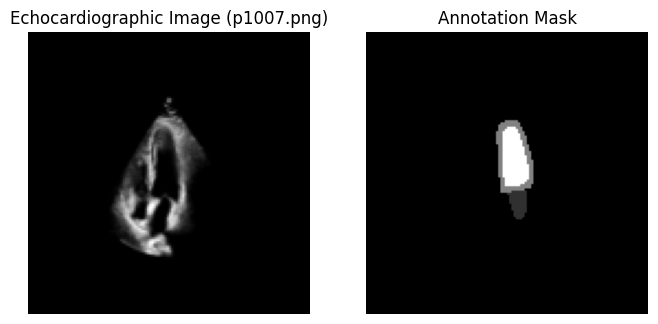

Unique classes in sample 11 (p1008.png): [  0  29  76 150]


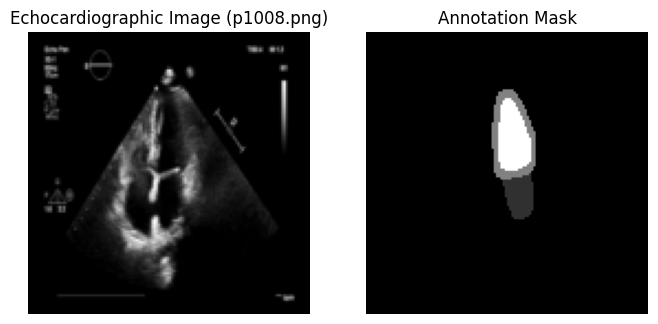

Unique classes in sample 12 (p1009.png): [  0  29  76 150]


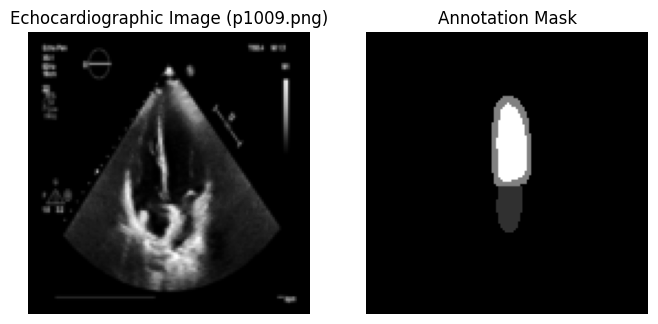

Unique classes in sample 13 (p101.png): [  0  29  76 150]


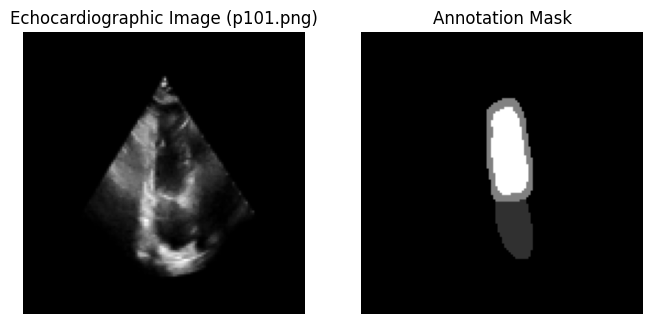

Unique classes in sample 14 (p1010.png): [  0  29  76 150]


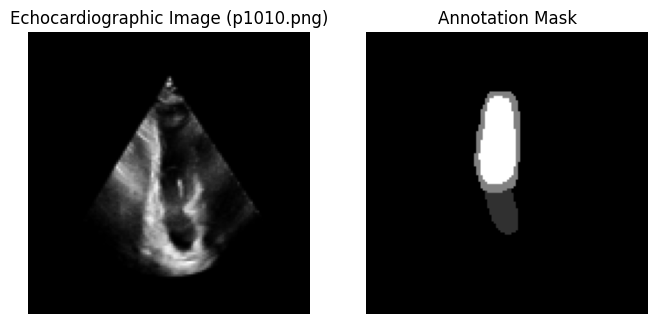

Unique classes in sample 15 (p1011.png): [  0  29  76 150]


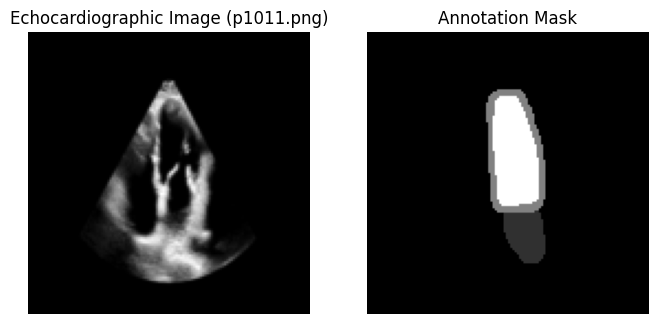

Unique classes in sample 16 (p1012.png): [  0  29  76 150]


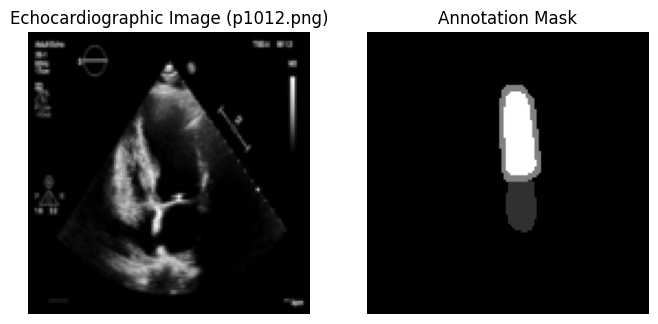

Unique classes in sample 17 (p1013.png): [  0  29  76 150]


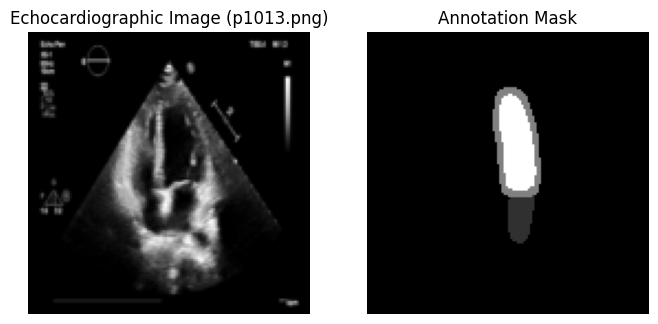

Unique classes in sample 18 (p1014.png): [  0  29  76 150]


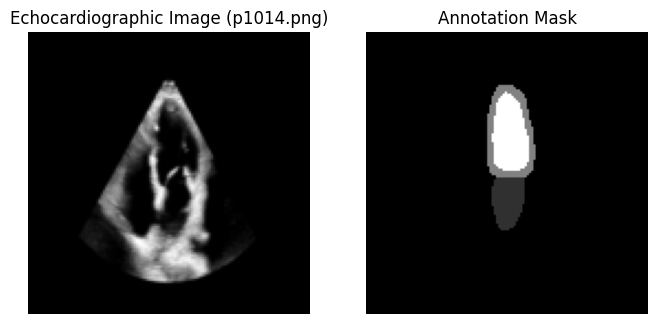

Unique classes in sample 19 (p1015.png): [  0  29  76 150]


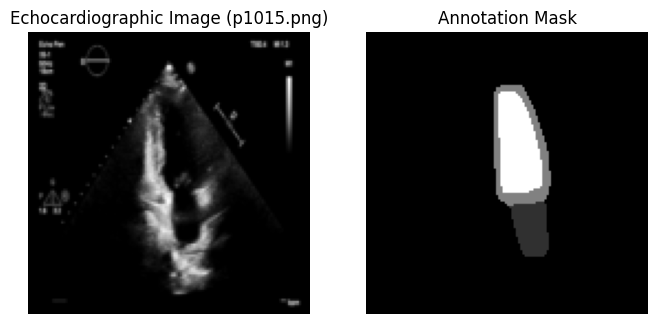

In [13]:
import matplotlib.pyplot as plt

# Iterate over the first 10 image filenames and their corresponding masks
for i in range(10,20):
    image_file = image_files[i]
    mask = train_masks[i]

    # Display the image
    plt.figure(figsize=(8, 8))
    plt.subplot(121)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Echocardiographic Image ({image_file})")
    plt.axis('off')

    # Display the corresponding annotation mask
    plt.subplot(122)
    plt.imshow(mask, cmap='gray')
    plt.title("Annotation Mask")
    plt.axis('off')

    # Show the unique pixel values in the annotation mask
    unique_classes = np.unique(mask)
    print(f"Unique classes in sample {i} ({image_file}): {unique_classes}")

    plt.show()


In [14]:
# Sort the image file list
image_files.sort()

# Initialize a counter for images with more than 4 unique classes
count_images_more_than_4_classes = 0

# Iterate over all the sorted image filenames and their corresponding masks
for i in range(len(image_files)):
    mask = train_masks[i]

    # Calculate the unique classes in the annotation mask
    unique_classes = np.unique(mask)

    # Check if the number of unique classes is greater than 4
    if len(unique_classes) > 4:
        count_images_more_than_4_classes += 1

# Print the count of images with more than 4 unique classes
print(f"Number of images with more than 4 unique classes: {count_images_more_than_4_classes}")


Number of images with more than 4 unique classes: 0


In [15]:
# Sort the image file list
image_files.sort()

# Initialize a counter for images with more than 4 unique classes
count_images_more_than_4_classes = 0

# List to store the names of images with more than 4 unique classes
images_more_than_4_classes = []

# Iterate over all the sorted image filenames and their corresponding masks
for i in range(len(image_files)):
    image_file = image_files[i]
    mask = train_masks[i]

    # Calculate the unique classes in the annotation mask
    unique_classes = np.unique(mask)

    # Check if the number of unique classes is greater than 4
    if len(unique_classes) > 4:
        count_images_more_than_4_classes += 1
        images_more_than_4_classes.append(image_file)

# Print the count of images with more than 4 unique classes and their names
print(f"Number of images with more than 4 unique classes: {count_images_more_than_4_classes}")
print("Names of images with more than 4 unique classes:")
for image_name in images_more_than_4_classes:
    print(image_name)


Number of images with more than 4 unique classes: 0
Names of images with more than 4 unique classes:


In [16]:
# # Sort the image file list
# image_files.sort()

# # Define the specific image filenames
# specific_images = ['p684.png', 'p688.png', 'p697.png', 'p701.png', 'p73.png', 'p731.png', 'p732.png',
#                    'p755.png', 'p759.png', 'p764.png', 'p767.png', 'p775.png']

# # Iterate over the sorted image filenames and their corresponding masks
# for i, image_file in enumerate(image_files):
#     if image_file in specific_images:
#         mask = train_masks[i]

#         # Display the image
#         plt.figure(figsize=(8, 8))
#         plt.subplot(121)
#         plt.imshow(train_images[i], cmap='gray')
#         plt.title(f"Echocardiographic Image ({image_file})")
#         plt.axis('off')

#         # Display the corresponding annotation mask
#         plt.subplot(122)
#         plt.imshow(mask, cmap='gray')
#         plt.title("Annotation Mask")
#         plt.axis('off')

#         # Show the unique pixel values in the annotation mask
#         unique_classes = np.unique(mask)
#         print(f"Unique classes in sample {i} ({image_file}): {unique_classes}")

#         plt.show()


In [17]:
print("train_images shape:", train_images.shape)
print("train_masks shape:", train_masks.shape)

train_images shape: (1550, 128, 128)
train_masks shape: (1550, 128, 128)


In [18]:
train_images = np.expand_dims(train_images, axis=-1)
train_masks = np.expand_dims(train_masks, axis=-1)

print("Expanded train_images shape:", train_images.shape)
print("Expanded train_masks shape:", train_masks.shape)


Expanded train_images shape: (1550, 128, 128, 1)
Expanded train_masks shape: (1550, 128, 128, 1)


In [19]:
from sklearn.model_selection import train_test_split

# Split the images and masks into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_images, train_masks, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)




In [20]:
# Print the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (992, 128, 128, 1)
y_train shape: (992, 128, 128, 1)
X_val shape: (248, 128, 128, 1)
y_val shape: (248, 128, 128, 1)
X_test shape: (310, 128, 128, 1)
y_test shape: (310, 128, 128, 1)


In [21]:
import numpy as np

num_classes = 4

# Map label values to valid class indices
label_map = {0: 0, 29: 1, 76: 2, 150: 3}

# Convert target labels to one-hot encoded format
y_train_mapped = np.vectorize(label_map.get)(y_train)
y_val_mapped = np.vectorize(label_map.get)(y_val)
y_test_mapped = np.vectorize(label_map.get)(y_test)

y_train_one_hot = np.eye(num_classes)[y_train_mapped]
y_val_one_hot = np.eye(num_classes)[y_val_mapped]
y_test_one_hot = np.eye(num_classes)[y_test_mapped]

print(y_train_one_hot.shape)
print(y_val_one_hot.shape)
print(y_test_one_hot.shape)


(992, 128, 128, 1, 4)
(248, 128, 128, 1, 4)
(310, 128, 128, 1, 4)


In [22]:
# Reshape target labels
y_train_one_hot = np.reshape(y_train_one_hot, (y_train_one_hot.shape[0], 128, 128, num_classes))
y_val_one_hot = np.reshape(y_val_one_hot, (y_val_one_hot.shape[0], 128, 128, num_classes))
y_test_one_hot = np.reshape(y_test_one_hot, (y_test_one_hot.shape[0], 128, 128, num_classes))

print(y_train_one_hot.shape)
print(y_val_one_hot.shape)
print(y_test_one_hot.shape)

(992, 128, 128, 4)
(248, 128, 128, 4)
(310, 128, 128, 4)


In [23]:
from keras_unet_collection import models

In [24]:
model = models.att_unet_2d((128, 128, 1), [64, 128, 256, 512], n_labels=4,
                           stack_num_down=2, stack_num_up=2,
                           activation='ReLU', atten_activation='ReLU', attention='add', output_activation='Softmax', 
                           batch_norm=True, pool=False, unpool='bilinear', name='attunet')

2023-06-13 09:21:44.943234: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1638] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78816 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:4b:00.0, compute capability: 8.0


In [25]:
print(model.summary())


Model: "attunet_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 attunet_down0_0 (Conv2D)       (None, 128, 128, 64  576         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 attunet_down0_0_bn (BatchNorma  (None, 128, 128, 64  256        ['attunet_down0_0[0][0]']        
 lization)                      )                                                     

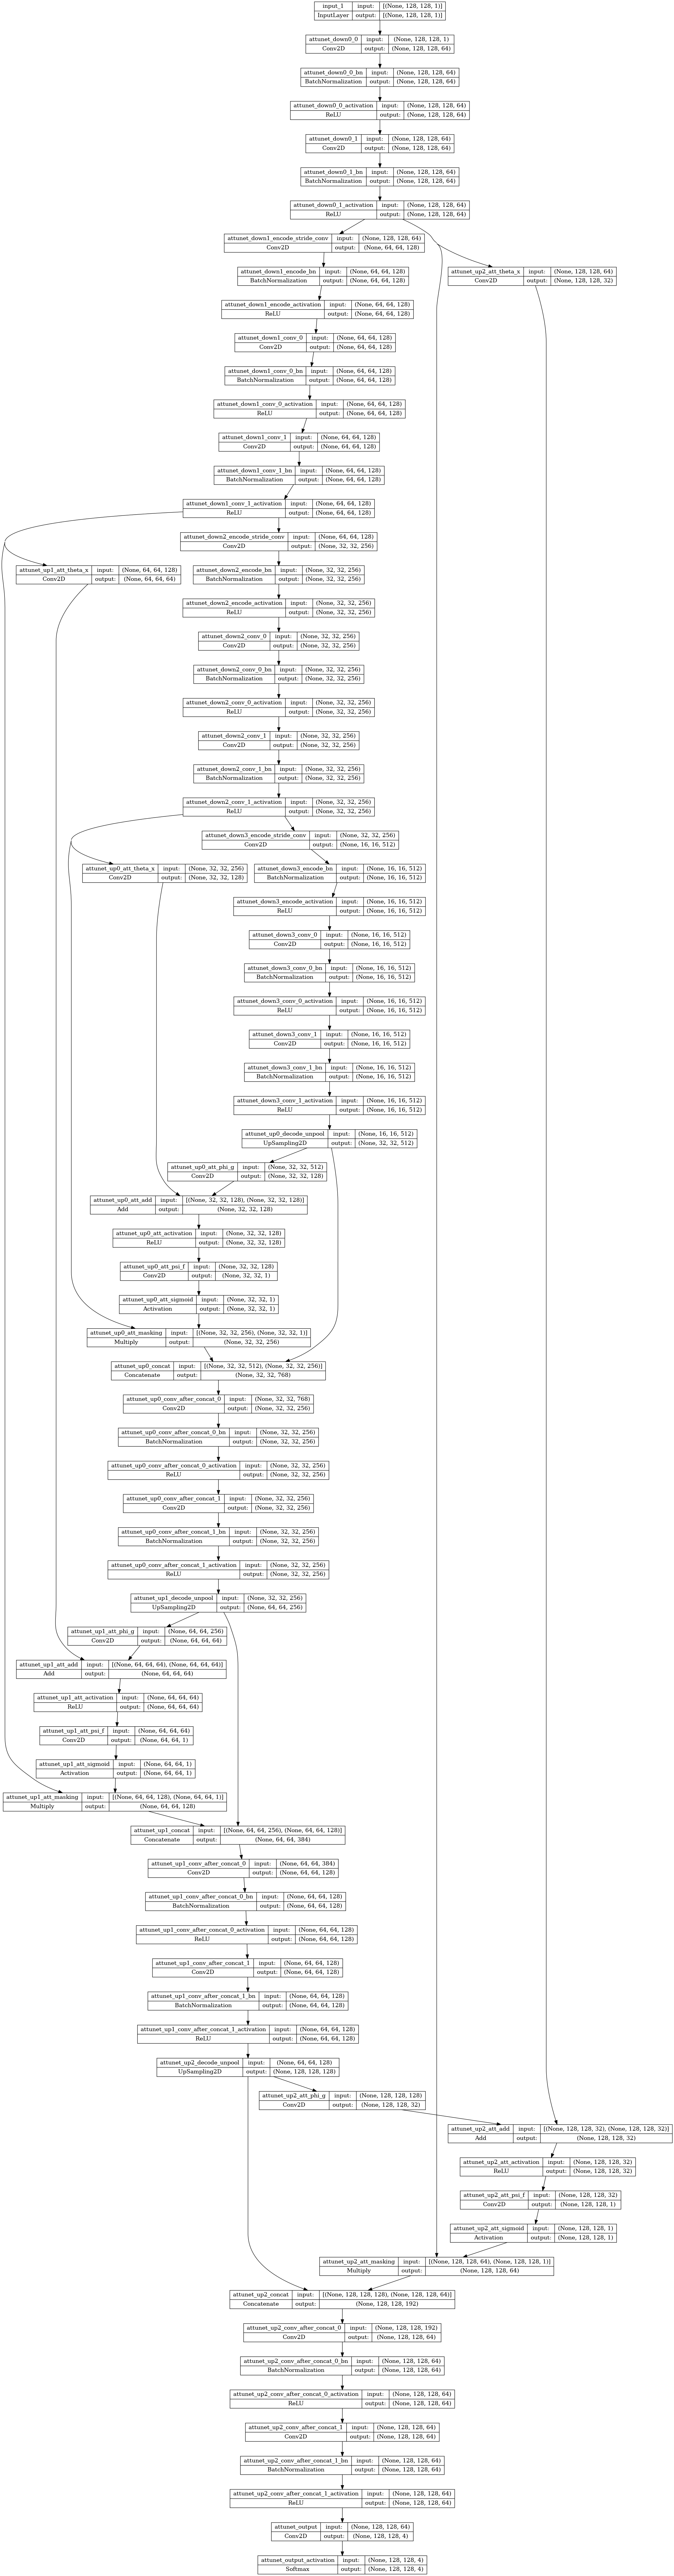

In [26]:
tf.keras.utils.plot_model(model,to_file="/workspace/attentionUnet/Attention_Unet.png",show_shapes=True,show_layer_names=True)

In [27]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [28]:
print(y_train_one_hot.shape)
print(y_val_one_hot.shape)

(992, 128, 128, 4)
(248, 128, 128, 4)


In [29]:
# Fit the model
import time
begin = time.time()
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot), batch_size=8, epochs=80)
end = time.time()
print(end-begin)

Epoch 1/80


2023-06-13 09:21:54.667738: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8901
2023-06-13 09:21:56.158160: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f9432edfca0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-13 09:21:56.158208: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA A100 80GB PCIe, Compute Capability 8.0
2023-06-13 09:21:56.165102: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-13 09:21:56.385658: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


123/124 [============================>.] - ETA: 0s - loss: 1.0789 - accuracy: 0.7056

2023-06-13 09:22:14.575360: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:655] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


124/124 [==============================] - 26s 58ms/step - loss: 1.0762 - accuracy: 0.7073 - val_loss: 0.9025 - val_accuracy: 0.9298
Epoch 2/80
124/124 [==============================] - 4s 32ms/step - loss: 0.5751 - accuracy: 0.9377 - val_loss: 0.6168 - val_accuracy: 0.9298
Epoch 3/80
124/124 [==============================] - 4s 33ms/step - loss: 0.4370 - accuracy: 0.9519 - val_loss: 0.4921 - val_accuracy: 0.9298
Epoch 4/80
124/124 [==============================] - 4s 35ms/step - loss: 0.3834 - accuracy: 0.9552 - val_loss: 0.4273 - val_accuracy: 0.9308
Epoch 5/80
124/124 [==============================] - 4s 34ms/step - loss: 0.3514 - accuracy: 0.9576 - val_loss: 0.3982 - val_accuracy: 0.9385
Epoch 6/80
124/124 [==============================] - 4s 34ms/step - loss: 0.3278 - accuracy: 0.9598 - val_loss: 0.3465 - val_accuracy: 0.9513
Epoch 7/80
124/124 [==============================] - 4s 33ms/step - loss: 0.3085 - accuracy: 0.9615 - val_loss: 0.3263 - val_accuracy: 0.9541
Epoch 8/8

In [30]:
############################################################
#Evaluate the model
	# evaluate model



_, acc = model.evaluate(X_test, y_test_one_hot)

print("Accuracy is = ", (acc * 100.0), "%")

10/10 [==============================] - 5s 220ms/step - loss: 0.2429 - accuracy: 0.9536
Accuracy is =  95.35602927207947 %


In [31]:
# Save the model with a specific path
model.save('/workspace/attentionUnet/attention_Unet.h5')

# from tensorflow.keras.models import load_model

# # Load the saved model
# loaded_model = load_model('model.h5')

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/workspace/Unet/loss', facecolor='w')
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('/workspace/Unet/Accuracy', facecolor='w')
plt.show()


In [ ]:
###
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/workspace/attentionUnet/loss')
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('/workspace/attentionUnet/accuracy')
plt.show()




In [34]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)

10/10 [==============================] - 1s 18ms/step


In [35]:
############################################################
#Evaluate the model
	# evaluate model



_, acc = model.evaluate(X_test, y_test_one_hot)

print("Accuracy is = ", (acc * 100.0), "%")

10/10 [==============================] - 0s 26ms/step - loss: 0.2429 - accuracy: 0.9536
Accuracy is =  95.35602927207947 %


In [38]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape:", y_test.shape)
print("y_train_one_hot: ",y_train_one_hot.shape)


X_train shape: (992, 128, 128, 1)
y_train shape: (992, 128, 128, 1)
X_val shape: (248, 128, 128, 1)
y_val shape: (248, 128, 128, 1)
X_test shape:  (310, 128, 128, 1)
y_test shape: (310, 128, 128, 1)
y_train_one_hot:  (992, 128, 128, 4)
